In [2]:
import numpy as np
from core import Core
from dataset import Dataset
from pprint import pprint
from sklearn import metrics
from sklearn import tree
import pickle

In [3]:
ds = Dataset('./M06/Predicted Texts/')

Loading cores from directory ./M06/Predicted Texts/ ...
Synchronizing cell types over all cores in dataset...


In [3]:
ds.calculate_biomarker()

In [4]:
count = 0
for key, value in ds.log_rank_p.items():
    if "neighbourhood" in key:
        count += 1
        print(key, value)
print(count)

Fraction of cellular neighbourhoods 0 / 5 [0.686432960050152, 0.6723995916309351, 0.14547875903986232]
Fraction of cellular neighbourhoods 1 / 5 [0.8030004937427788, 0.8188964768227843, 0.12217529970986023]
Fraction of cellular neighbourhoods 2 / 5 [0.2036505462154428, 0.12025582488582985, 0.162670280950872]
Fraction of cellular neighbourhoods 3 / 5 [0.40131233684959355, 0.3074575005105453, 0.026045657031281633]
Fraction of cellular neighbourhoods 4 / 5 [0.5318306031087153, 0.8795815999196521, 0.05122353936304314]
Entropy of cellullar neighbourhood distribution for 5 [0.5893859053474615, 0.5830315409392832, 0.0681395279839794]
6


In [5]:
count = 0
for key, value in ds.log_rank_p.items():
    if min(value) < 0.05 and not "Others" in key:
        count += 1
        print(key, value)
print(count)

Lymphocyte_average_area_px^2 [0.0005115355475371821, 0.001670608922846363, 0.006358365540524824]
Neutrophil_average_area_px^2 [0.022004828205427138, 0.086370173800443, 0.0014917233448875488]
Lymphocyte_density_mu^2 [0.40797872162735904, 0.44203417891010455, 0.026045657031281633]
Neutrophil_density_mu^2 [0.137261193447293, 0.07419458270688321, 0.01774250174964146]
Lymphocyte_fraction [0.3748750305318016, 0.41793386919108444, 0.026045657031281633]
G-function L1 for Lymphocyte to Lymphocyte [0.343322664630928, 0.20141305239970553, 0.02595229482761875]
G-function L1 for Lymphocyte to Macrophage [0.7520979266213185, 0.6434026414735061, 0.02912110755680865]
G-function L1 for Tumor to Neutrophil [0.16356207528441855, 0.2656360039225347, 4.962513541369902e-10]
Fraction of Lymphocyte among 50 closest cells next to Lymphocyte [0.9287735976678065, 0.5346154089154195, 0.02944204044787672]
Fraction of Lymphocyte among 50 closest cells next to Macrophage [0.05870463544333802, 0.04564376877093659, 0.

In [14]:
count = 0
for key, value in ds.cox_p.items():
    if value < 0.1 and not "Others" in key:
        print(key, value, ds.hazard_ratios[key])
        count += 1
print(count)

Lymphocyte_average_area_px^2 0.03285638952929696 0.9830778441351636
Neutrophil_average_area_px^2 0.04708469031179319 0.9819461079165337
Neutrophil_density_mu^2 0.0783531073046302 inf
G-function L1 for Lymphocyte to Lymphocyte 0.08611584425896372 1.0338272190136153
Fraction of Lymphocyte among 50 closest cells next to Macrophage 0.07019646307324533 0.1143842245703483
Average amount of Tumor cells within 50mu of Macrophage 0.09090550282775212 1063.2867135904316
G-function L1 for Macrophage to Lymphocyte 0.03363032104690248 1.0281872908887628
G-function L1 for Macrophage to Tumor 0.0701482502130612 0.9740674952335361
K-function L1 for Lymphocyte to Neutrophil 0.08840094740921338 0.9999856435272094
K-function L1 for Neutrophil to Neutrophil 0.07385229472086126 0.999983468571661
K-function L1 for Tumor to Neutrophil 0.08344461781395728 0.9999850232853997
11


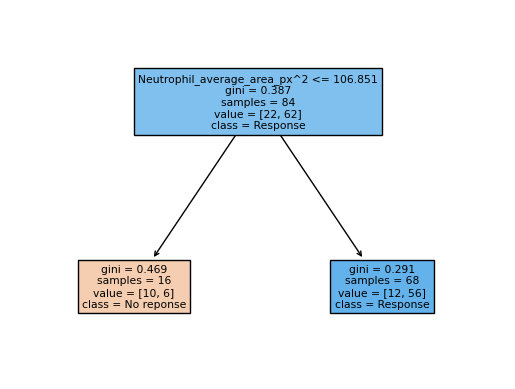

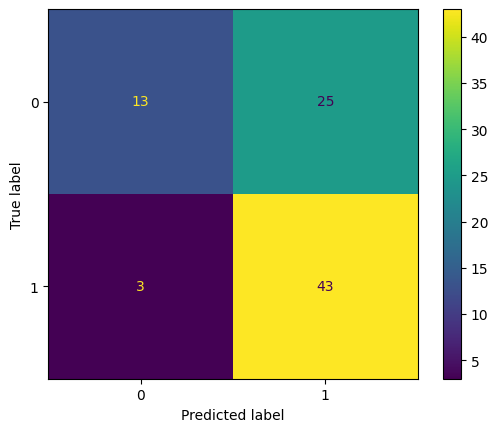

In [11]:
ds.construct_decision_tree(max_depth=1, survival_cutoff=12)
features, labels, names = ds.get_features()
pred = ds.decision_tree.predict(features)
cm = metrics.confusion_matrix(labels, pred)
tree.plot_tree(ds.decision_tree, feature_names=names, class_names=['No reponse', 'Response'], filled=True)
metrics.ConfusionMatrixDisplay(cm).plot()